# Module 7: Testing the goodness of fit of data to probability distributions

We have earlier touched upon the question of how good a sample fits a certain probability distribution. Today we will approach this question more systematically and quantitatively, introducing common tests that are carried out within the framework of hypothesis testing. Many more tests exist, and it's often not clear which one is the best (i.e. the most powerful).


## Outline

* Chi-square test
* Kolmogorov-Smirnov test


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## The chi-square test

- **Chi-square distribution**

If $z \sim N(0,1)$, then $\sum z^2$ would follow
a Chi-square $\chi^2$ distribution as mentioned earlier (lecture 4):

$$ \chi_n^2 = \sum_{i=1}^n Z_i^2 = \sum_{i=1}^n \left( \frac{x_i - \mu}{\sigma}\right)^2 $$

The $\chi^2$ distribution can be used to compare whether the distribution of the data is different from a predetermined distribution and to test the significance of the similarity/dissimilarity.
The idea is to construct a test statistic that is $\chi^2$-distributed under the null hypothesis (i.e. the data is drawn from the predetermined distribution).

The $\chi^2$ test is most often used on data that have been grouped into classes. Assuming that our
observations have been grouped into $k$ classes, the test statistic is found as:

$$ \chi^2 = \sum_{j=1}^k \frac{(O_j - E_j)^2}{E_j} $$

where $O_j$ and $E_j$ are the number of observed and expected values in the j'th class.

- **Procedure of using $\chi^2$ test**
    - Group data into classes ($5\sim10$)
    - Count the number of observations in each class, denote it as $O_j$ (i.e. integrate the pdf)
    - Determine the expected number of observations in each class $E_j$, which equals to the expected
        relative frequency (based on assumed distribution) multiplied by the total number of observations
        
        - note here that $E_j$ does not have to be an integer value (but must be different from zero)
    - Calculate the test statistic: $$ \chi^2 = \sum_{j=1}^k \frac{(O_j - E_j)^2}{E_j} $$
    
    - Any real and finite batch of data will exhibit sampling fluctuations resulting in a nonzero value for $\chi^2$, even if the null hypothesis is true and the theoretical distribution fits very well
    - The *null hypothesis* that the data are from the fitted distribution is rejected if: 
    
    $$ \chi^2 > \chi_{1-\alpha,k-1-p}^2$$
    
where: $\alpha$ is the significance level, $k-p-1$ degrees of freedom, $k$ the number of classes, $p$ the number of
parameters of the specified distribution.

Note that

* the test is one-sided because small values of the test statistic support $H_0$

* this test is most natural for discrete variables (which are already binned in classes)

* the value of the test statistic depends on the choice of bins

* you could even use variable bin widths, e.g. to get equal expected values



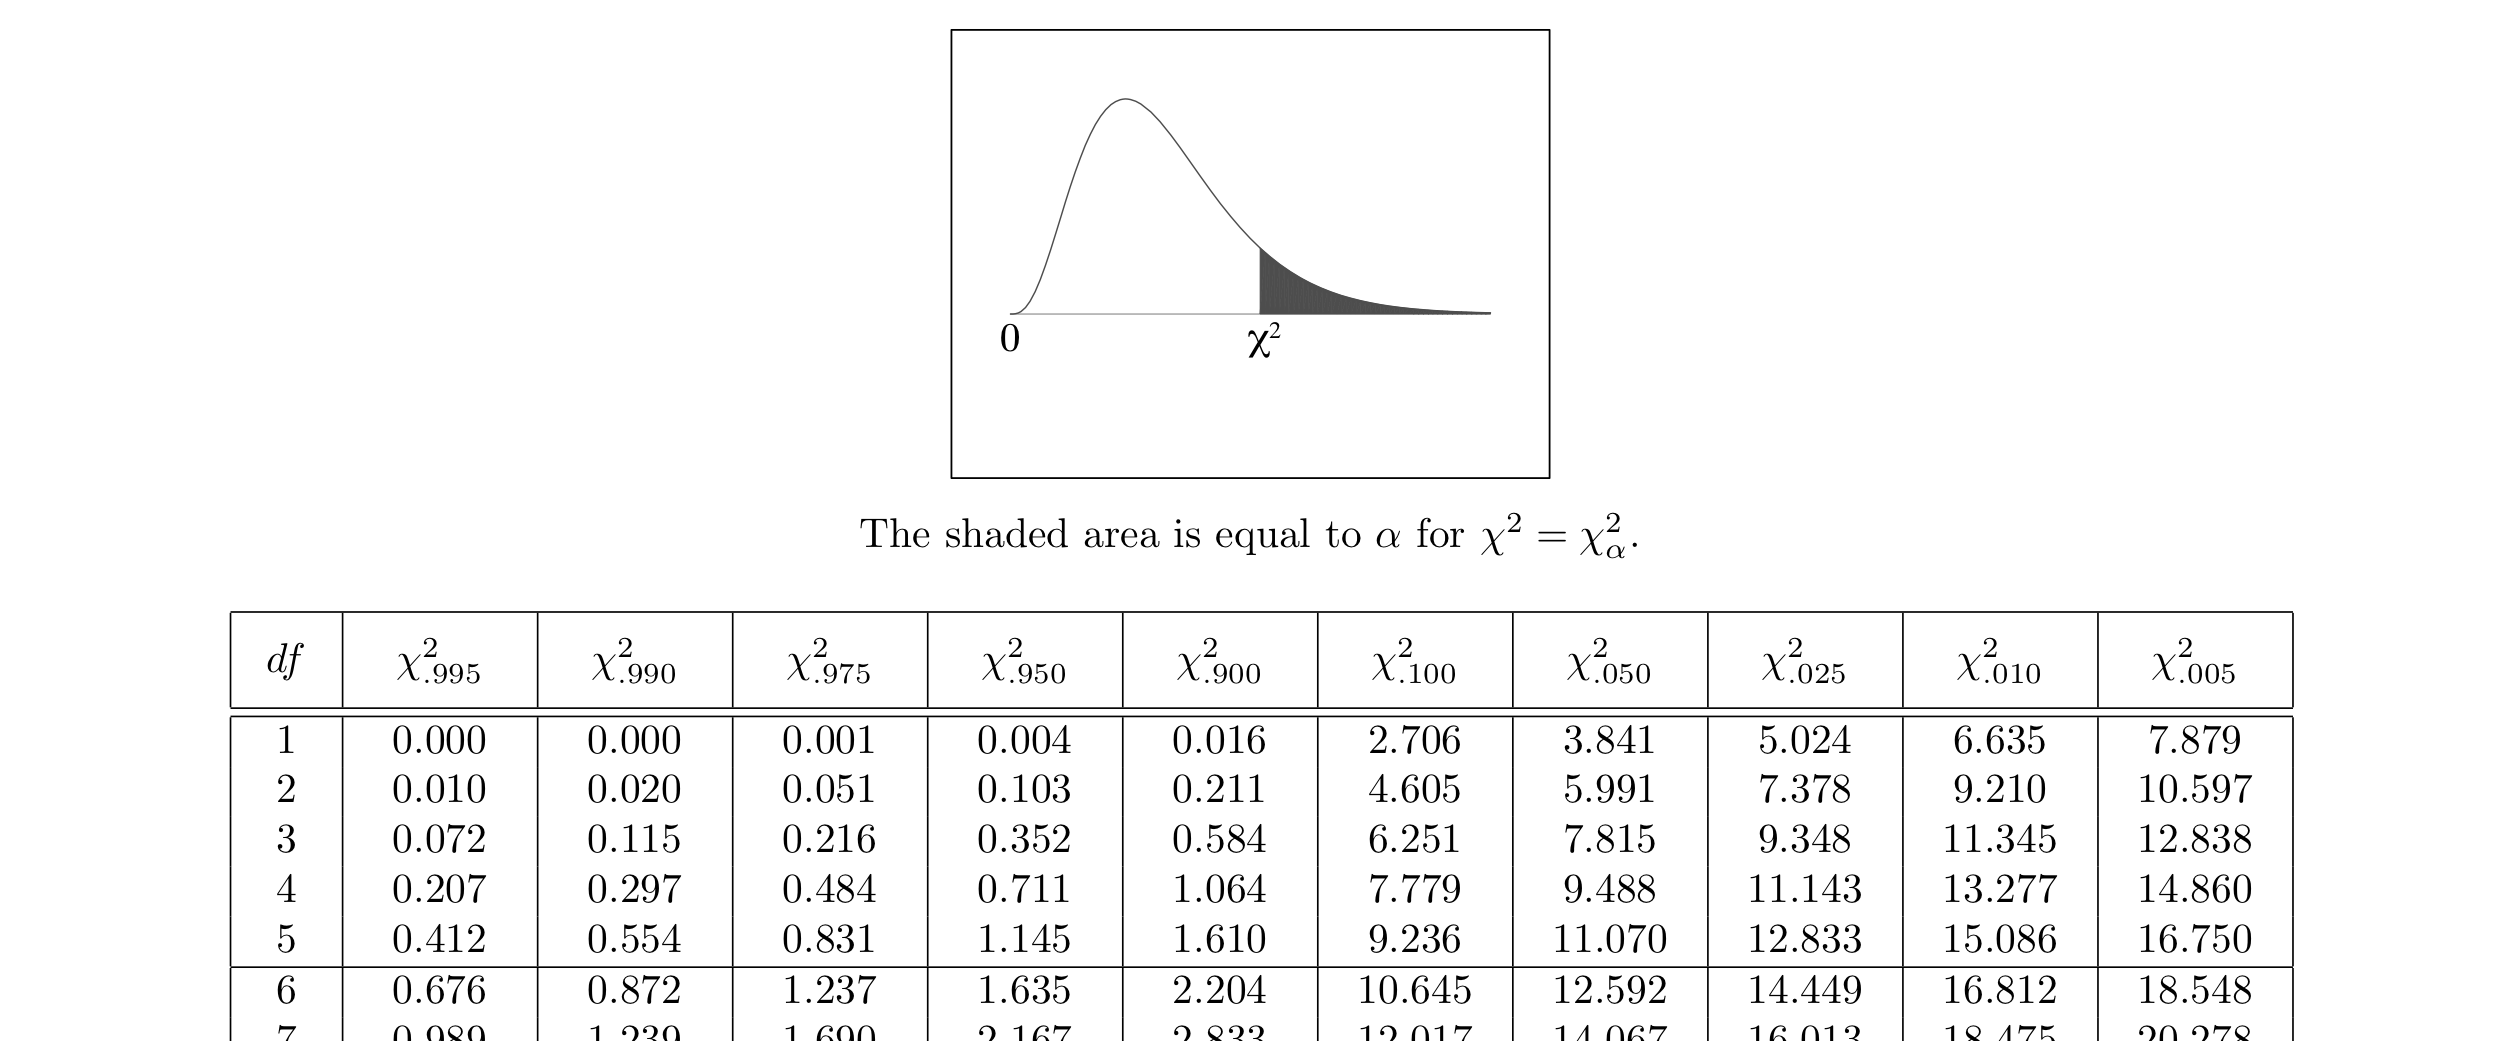

### Example 7.2: Test if a die is fair

If the die is fair, the chance for each side up shall be the same if it is tossed many times (the
expected number is uniformly distributed). An example is done by tossing $60$ time and the
outcomes are:

**Table 7.2: Outcomes of tossing the die $60$ times**

|Side|Number of times|
|---:|---:|
|1|4|
|2|6|
|3|17|
|4|16|
|5|8|
|6|9|

**Solution:**

$$H_0\text{: the die is fair}; \ \ \ H_a\text{: the die is not fair}$$

Decision rule: Reject $H_0$ if

$$\chi_c^2 > \chi_{1-\alpha,k-p-1}^2$$

where $\alpha=0.05$, $k=6$, $p=0$.

**Table 7.3: Calculation of $\chi_c^2$ test statistic**

|Side|Observed frequency (O)|Expected frequency (E) | $\frac{(O-E)^2}{E}$|
|---:|---:|---:|---:|
|1|4|10|3.6|
|2|6|10|1.6|
|3|17|10|4.9|
|4|16|10|3.6|
|5|8|10|0.4|
|6|9|10|0.1|

$$\Rightarrow \chi_c^2 = \sum_{i=1}^6 \frac{(O_i - E_i)^2}{E_i} = 14.2$$

$$\chi_{0.95,5}^2 = 11.1$$

Since $\chi_c^2 > \chi_{0.95,5}^2$, the hypothesis that the die is fair is rejected.

### Example 7.3: Test if the gender of new born babies in a city is biased

In a city there are $442$ babies born in two months, of which $224$ are boys and $218$ girls, test if the
gender of babies is biased at $5\%$ significance level. (i.e. test if the sample is uniformly distributed).

**Solution:**

$$H_0\text{: sample is not biased}; \ \ \ H_a\text{: sample is biased}$$

Test statistic:

$$\chi_c^2 = \sum_{i=1}^k \frac{(O_i-E_i)^2}{E_i}$$

Decision rule: Reject $H_0$ if

$$\chi_c^2 > \chi_{1-\alpha,k-p-1}^2$$

where $\alpha = 0.05$, $k=2$, $p=0$.

**Table 7.4:Calculation of $\chi_c^2$ test statistic**

|Class|Expected number (E) | Observed number (O) | $\frac{(O-E)^2}{E}$ |
|---:|---:|---:|---:|
|**Female**|221|224|0.041|
|**Male**|221|218|0.041|

$$\Rightarrow \chi_c^2 = \sum_{i=1}^2 \frac{(O_i-E_i)^2}{E_i} = 0.041+0.041 = 0.082 $$

$$\chi_{1-0.05,2-0-1}^2 = \chi_{0.95,1}^2 = 3.8$$

Since $\chi_c^2 < \chi_{0.95,1}^2$, we cannot reject the hypothesis that the sample is not biased.

### Example 7.1: Test if data is normally distributed

The annual peak flow of Kentucky River is measured for $66$ years (Haan, table $2.1$).
We know that 

$$ N = 66; \ \ Q_{\text{mean}} = 67.5 \ \ (\text{calculated from data}); \ \ \sigma = 21.0 \ \ (\text{calculated from data})  $$

At significance level $\alpha=0.05$ test the null hypothesis that the annual peak flow is normally
distributed.

**Solution:**

$$H_0\text{:} \ \ \text{data normally distributed}; \ \ \ \ H_a\text{:} \ \ \text{data not normally distributed}$$

Test statistic:

$$ \chi^2 = \sum_{i=1}^k \frac{(O_i - E_i)^2}{E_i} $$

Reject $H_0$ if:

$$ \chi^2 = \sum \frac{(O-E)^2}{E} > \chi_{1-\alpha,k-p-1}^2 $$

The expected relative frequency, e.g. of the first class, is calculated as:

$$f_{x_i} = P(20 < x < 30) = P\left(z < \frac{30-67.5}{21}\right) - P\left(z < \frac{20-67.5}{21}\right)$$

$$\Rightarrow f_{x_{i}} = P(z < -1.78) - P(z<-2.26) = [1-P(z<1.78)] - [1-P(z<2.26)] $$

$$\Rightarrow f_{x_i} = 0.026 $$

The probabilities of z-values can be found in lookup tables: https://en.wikipedia.org/wiki/Standard_normal_table#Cumulative

$O=$ observed number of data in each class

$E=$ expected number of data in each class $=f_{x_i}\cdot N$

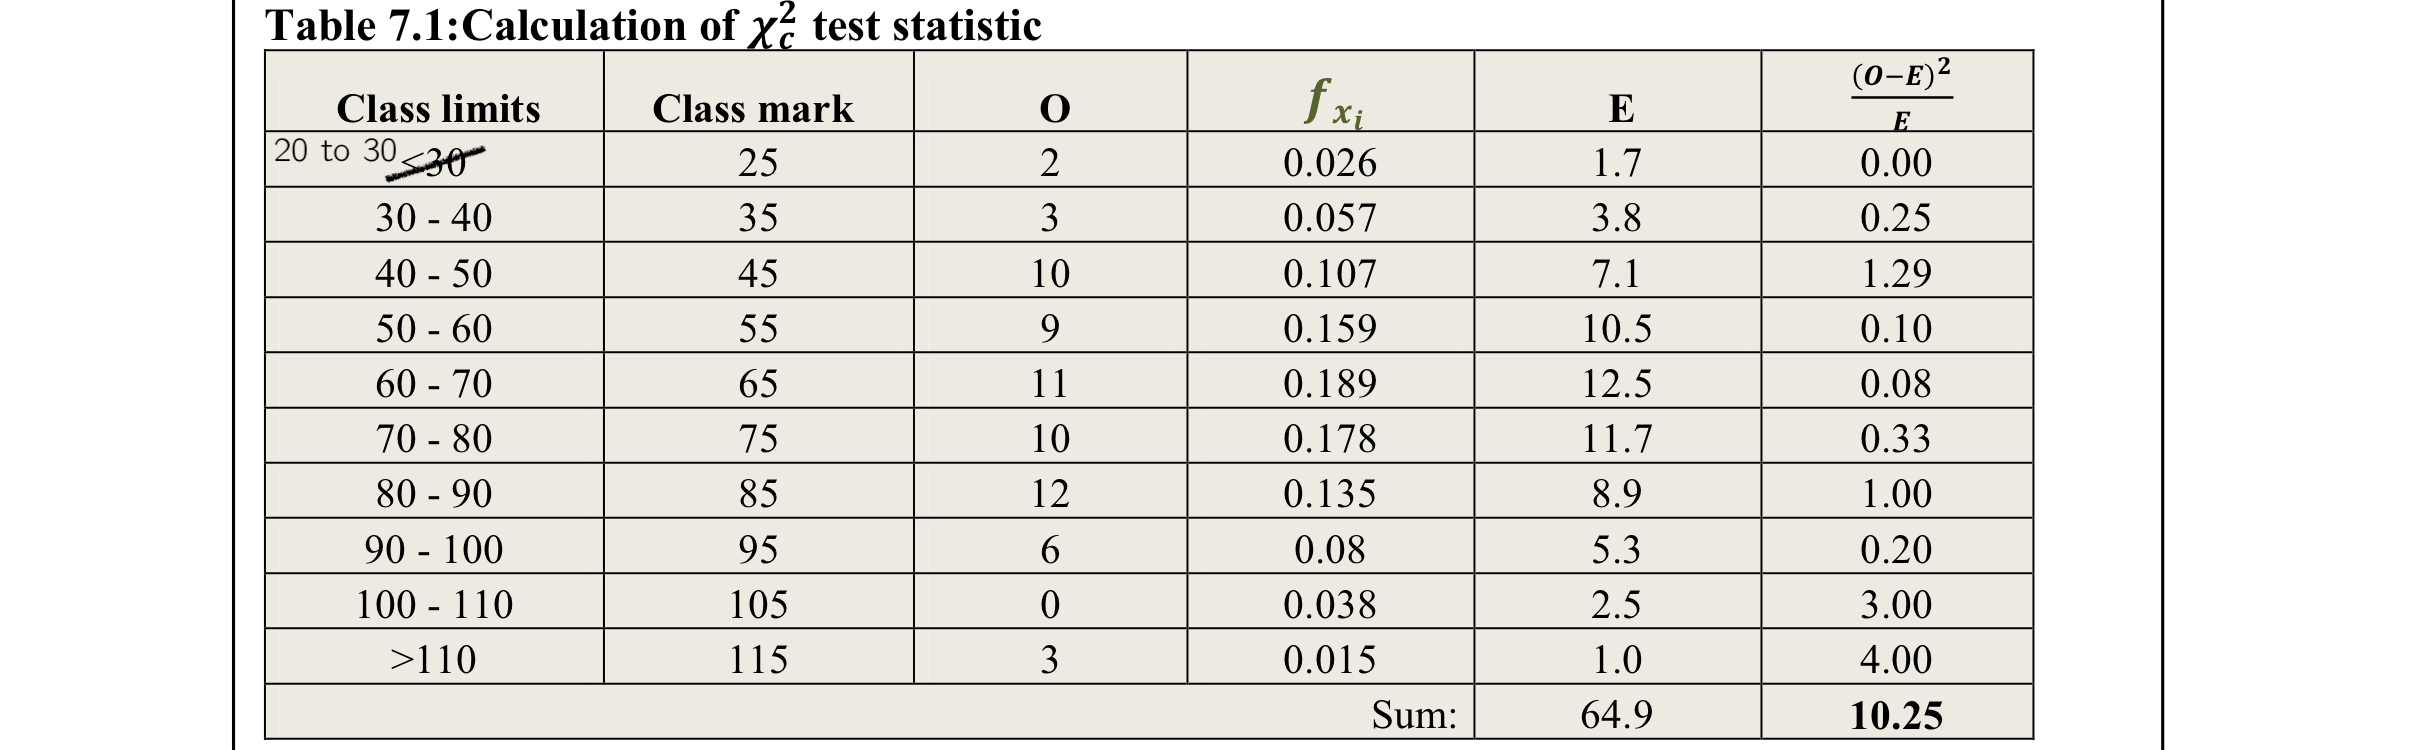

$$\Rightarrow \chi^2 = 10.25$$

$k=$ number of classes $=10$

$p=$ number of parameters in the assumed distribution (normal) $=2$ (mean and variance)

!Note that the chi-square table in the appendix gives the values for $\chi_{\alpha,k−p−1}^2$, therefore we should look up:

$$\chi_{\alpha,k-p-1}^2 = \chi_{0.05,10-2-1}^2 = \chi_{0.05,7}^2 = 14.1$$

$$\Rightarrow \chi_c^2 < \chi_{0.05,7}^2$$

and therefore we cannot reject the hypothesis that the data are normally distributed.

### Example with more data: 10 Hz temperature data

In [2]:
df = pd.read_csv('2018-08-13T113000.csv',index_col=0,parse_dates=True)
df.head()

#df=df[:100]
#df['T_degC'].plot()

,u_m/s,v_m/s,w_m/s,T_degC,CO2_ppm,H2O_ppt
2018-08-13 11:30:00.000,-0.259165,3.33241,0.406093,10.876847,394.112,7.45510
2018-08-13 11:30:00.100,-0.114277,3.36608,0.832847,11.093791,394.535,7.32271
2018-08-13 11:30:00.200,-0.274470,3.76503,0.525727,11.331010,395.316,6.98443
2018-08-13 11:30:00.300,-0.258144,4.00175,0.402011,10.955879,395.061,6.91087
2018-08-13 11:30:00.400,-0.337730,3.95175,0.338240,10.984468,395.143,6.85304


<IPython.core.display.Javascript object>


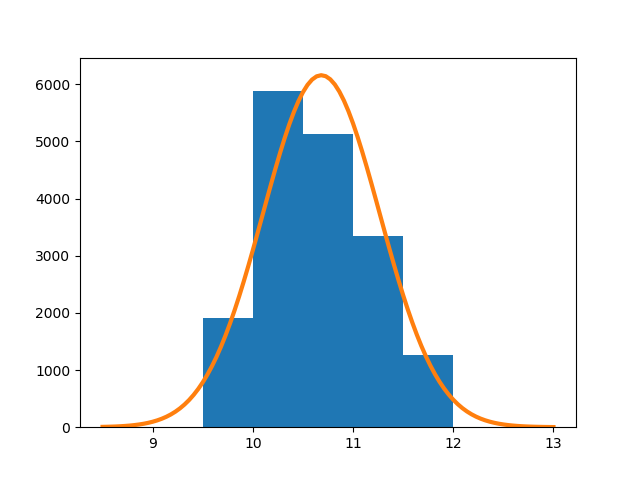

In [3]:
N=len(df['T_degC'])
use_bins=[9.5,10.,10.5,11.,11.5,12.]

h=plt.hist(df['T_degC'], cumulative=False, density=False, bins=use_bins)

x=np.linspace(np.min(use_bins)-1,np.max(use_bins)+1,100)

plt.plot(x, N*0.5*stats.norm.pdf(x, df['T_degC'].mean(), df['T_degC'].std()), linewidth=3)


In [4]:
Ojs,bins=np.histogram(df['T_degC'], bins=use_bins) #5 bins (we could use a lot more here)
bins_leftedge=bins[:-1]

Ejs=[]
fs=[]
for this_bin in bins_leftedge:
    f=stats.norm.cdf(this_bin+0.5, df['T_degC'].mean(), df['T_degC'].std())- stats.norm.cdf(this_bin, df['T_degC'].mean(), df['T_degC'].std())
    fs.append(f)
    Ejs.append(f*N)

result_df=pd.DataFrame()
result_df['bins_leftedge']=bins_leftedge
result_df['Ojs']=Ojs
result_df['fs']=fs
result_df['Ejs']=Ejs
result_df['X2']=(Ojs-Ejs)**2/Ejs

print(result_df)
print("Sum of X2: "+str(result_df['X2'].sum()))
#the critical value for ndof=5-2-1 will be somewhere between 5 and 10 

print("Sum of relative frequencies: "+str(result_df['fs'].sum()))

   bins_leftedge   Ojs        fs          Ejs          X2
0            9.5  1917  0.099390  1789.023877    9.154650
1           10.0  5887  0.255995  4607.901428  355.062534
2           10.5  5127  0.329894  5938.084901  110.786344
3           11.0  3348  0.212874  3831.729939   61.067627
4           11.5  1264  0.068688  1236.380323    0.617000
Sum of X2: 536.6881549986605
Sum of relative frequencies: 0.9668400259596333


## Kolmogorov-Smirnov test

The **Kolmogorov-Smirnov** test is used to find out whether the distribution of a random variable is different from a predetermined distribution (i.e. one-sample), or from the empirical distribution of a second random variable (two-sample). It quantifies the significance of dissimilarity.

While the $\chi^2$ test works with the histogram and pdf, the KS test works on the cdf. For continuous distributions the KS test usually will be more powerful than the $\chi^2$ test and usually will be preferred.

The test is based on the comparison between the cumulative observed and expected theoretical
frequency curve of the distribution to be tested.

<IPython.core.display.Javascript object>


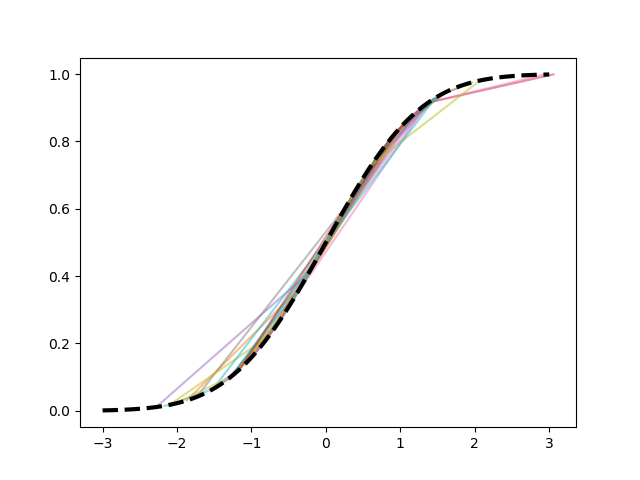

In [5]:
# cdfs of 30 random variables drawn from the same distribution
k=5

for i in range(30):
    rv1= np.sort( np.random.normal(loc=0.,scale=1.,size=k) ) # sorted normal random variable
    
    plt.plot(rv1, stats.norm.cdf(rv1), alpha=0.5)

x=np.linspace(-3,3,100)
plt.plot(x, stats.norm.cdf(x, 0, 1), 'k--', linewidth=3)

#### Procedure of the KS test:

- Calculate the expected cumulative frequency (values of cumulative distribution function), $F^e(x)$
- Calculate the sample cumulative frequency, $F^o(x)=k/n$, where $k$ is the number of observation less than or equal to $x$, and $n$ is the total number of observations.
- Determine the maximum deviation, $D$

$$D = \text{max}|F^e(x)-F^o(x)| $$

- Any real and finite batch of data will exhibit sampling fluctuations resulting in a nonzero value for $D$, even if the null hypothesis is true and the theoretical distribution fits very well

- If, for the chosen significance level, the value D is greater than or equal to critical tabulated value of the Kolmogorov-Smirnov statistic, the hypothesis that the data fit the tested distributed is rejected.

$$H_0\text{:} \ \ F^o(x) = F^e(x); \ \ \ H_a\text{:} \ \ F^o(x) \neq F^e(x) $$

- The critical value of the KS statistic depends on whether the assumed theoretical distribution was fitted used the test data, or if they are truely independent

- In the former case, the critical value even depends on the type of distribution fitted (normal, lognormal, exponential, Pearson, etc.)

- For the two-sample KS test with $n_1$ and $n_2$ samples, the critical value at level $\alpha$ can be estimated by

$$D = \sqrt{-\frac{1}{2}(1/n_1+1/n_2)ln(\frac{\alpha}{2})}$$


<IPython.core.display.Javascript object>


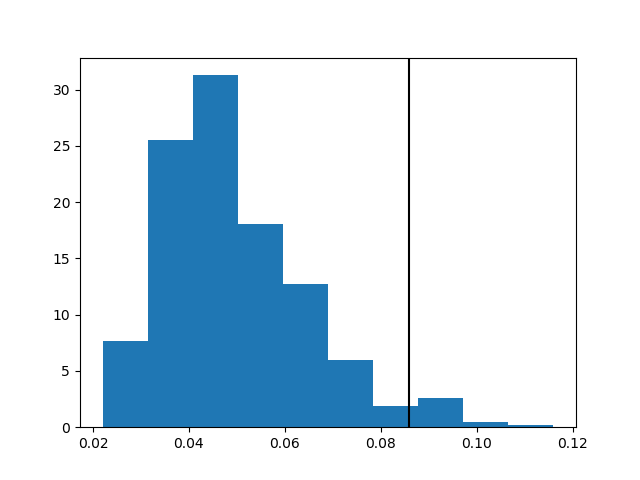

In [6]:
# two-sample KS statistic
k=500

D_all=[]
for i in range(500):
    rv1=np.sort( np.random.normal(loc=0.,scale=1.,size=k) )#sorted normal random variable
    rv2=np.sort( np.random.normal(loc=0.,scale=1.,size=k) ) 

    test_points=np.linspace(-5., 5, 300)
    D= np.max(np.abs( np.array( [np.sum(rv1<tp)/k for tp in test_points] ) 
                     - np.array( [np.sum(rv2<tp)/k for tp in test_points] ) ))
    
    D_all.append(D)

h=plt.hist(D_all, density=True)

alpha=0.05
D_critical=np.sqrt(-0.5*(1/k+1/k)*np.log(alpha/2))
plt.axvline(x=D_critical, color='k')


<IPython.core.display.Javascript object>


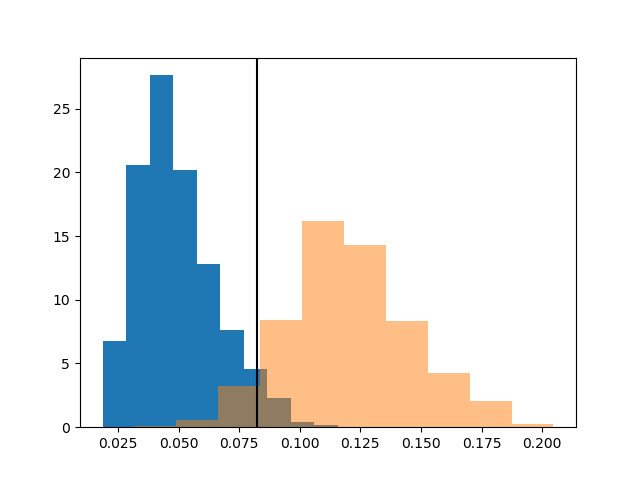

In [7]:
# two-sample KS statistic, extended

k=500
k2=600

D_all=[]
D_smalldiff_all=[]
for i in range(500):
    rv1=np.sort( np.random.normal(loc=0.,scale=1.,size=k) ) # sorted normal random variable
    rv2=np.sort( np.random.normal(loc=0.,scale=1.,size=k2) )
    
    rv3=np.sort( np.random.normal(loc=0.25,scale=1.,size=k2) )

    test_points=np.linspace(-5., 5, 300)
    D= np.max(np.abs( np.array( [np.sum(rv1<tp)/k for tp in test_points] )
                     - np.array( [np.sum(rv2<tp)/k2 for tp in test_points] ) ))
    
    D_all.append(D)
    
    
    D_smalldiff= np.max(np.abs( np.array( [np.sum(rv1<tp)/k for tp in test_points] )
                     - np.array( [np.sum(rv3<tp)/k2 for tp in test_points] ) ))
    
    D_smalldiff_all.append(D_smalldiff)

h=plt.hist(D_all, density=True)
h=plt.hist(D_smalldiff_all, density=True, alpha=0.5)

alpha=0.05
D_critical=np.sqrt(-0.5*(1/k+1/k2)*np.log(alpha/2))
plt.axvline(x=D_critical, color='k')

#the "orange area" to the right of this line will be 1-beta, i.e. the power of the test


### Example 7.4

The annual peak flows $Q[l/s]$ for $11$ years are given in the table below. Test the null hypothesis that
$Q$ is normally distributed, using the **Kolmogorov-Smirnov test**.

**Solution:**

$$F^o(x) = \text{observed cumulative frequency} = \frac{m_i}{11} $$

$$z = \text{standardized} \ \ Q = \frac{Q_i-Q_{\text{mean}}}{s}$$

$$Q_{\text{mean}} = 53.83; \ \ \ \ s = 24.63 $$

$$F^e(x) = \text{expected cumulative frequency} = P(Z<z_i) \ \ \text{(from normal distribution table)} $$

$$D = \text{deviation of observed from the expected cumulative frequency} = |F^e(Q)-F^o(Q)|$$

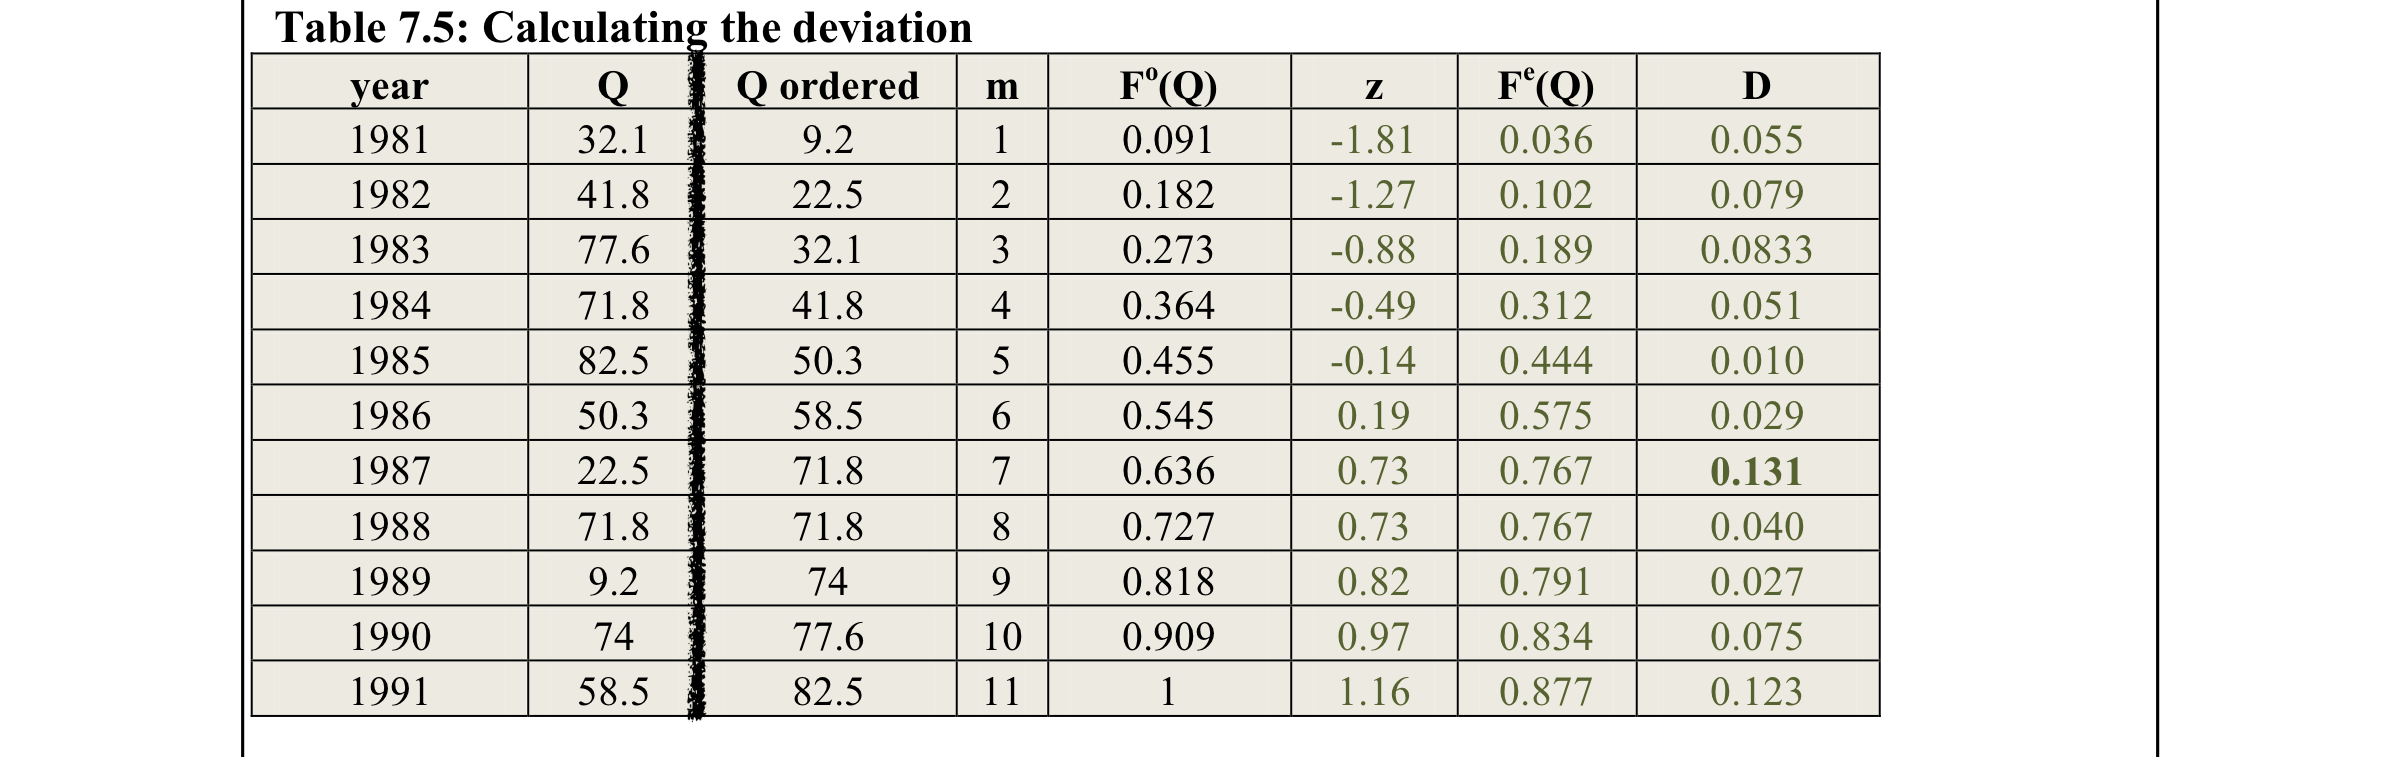

53.82727272727272 24.62568134728828


<IPython.core.display.Javascript object>


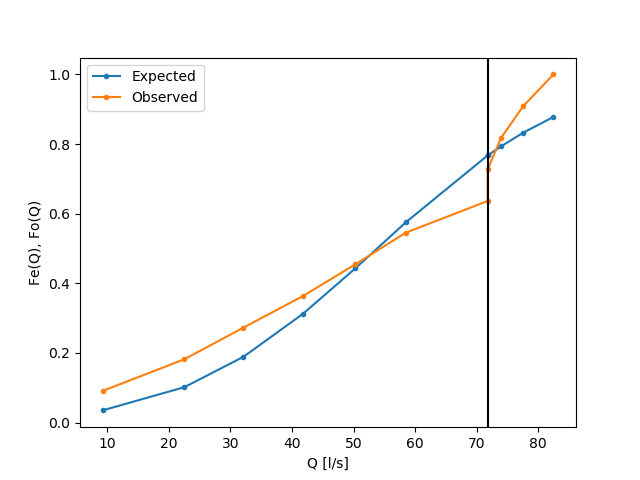

max|D| = 0.131


In [8]:
Q = np.array([32.1,41.8,77.6,71.8,82.5,50.3,22.5,71.8,9.2,74,58.5]) #Q[l/s]

Qmean = 53.83
s = 24.63
print(np.mean(Q),np.std(Q, ddof=1)) #just to check

Q_sorted = np.sort(Q) #Sort the Q values in ascending order

m = np.arange(1,12) #Create array m=[1,...,11] note that 12 is not in m when we use arange.
Fo = m/11.0 #Compute Fo

z = (Q_sorted-Qmean)/s #Compute z
Fe = stats.norm.cdf(z) #Compute Fe

D = np.abs(Fe-Fo)

plt.plot(Q_sorted,Fe,'.-',label='Expected')
plt.plot(Q_sorted,Fo,'.-',label='Observed')

plt.axvline(x=Q_sorted[np.argmax(D)],color='k')

plt.legend()
plt.ylabel('Fe(Q), Fo(Q)')
plt.xlabel('Q [l/s]')

print("max|D| = %.3f" % max(D))

For $\alpha = 0.05$ and $n=11$:

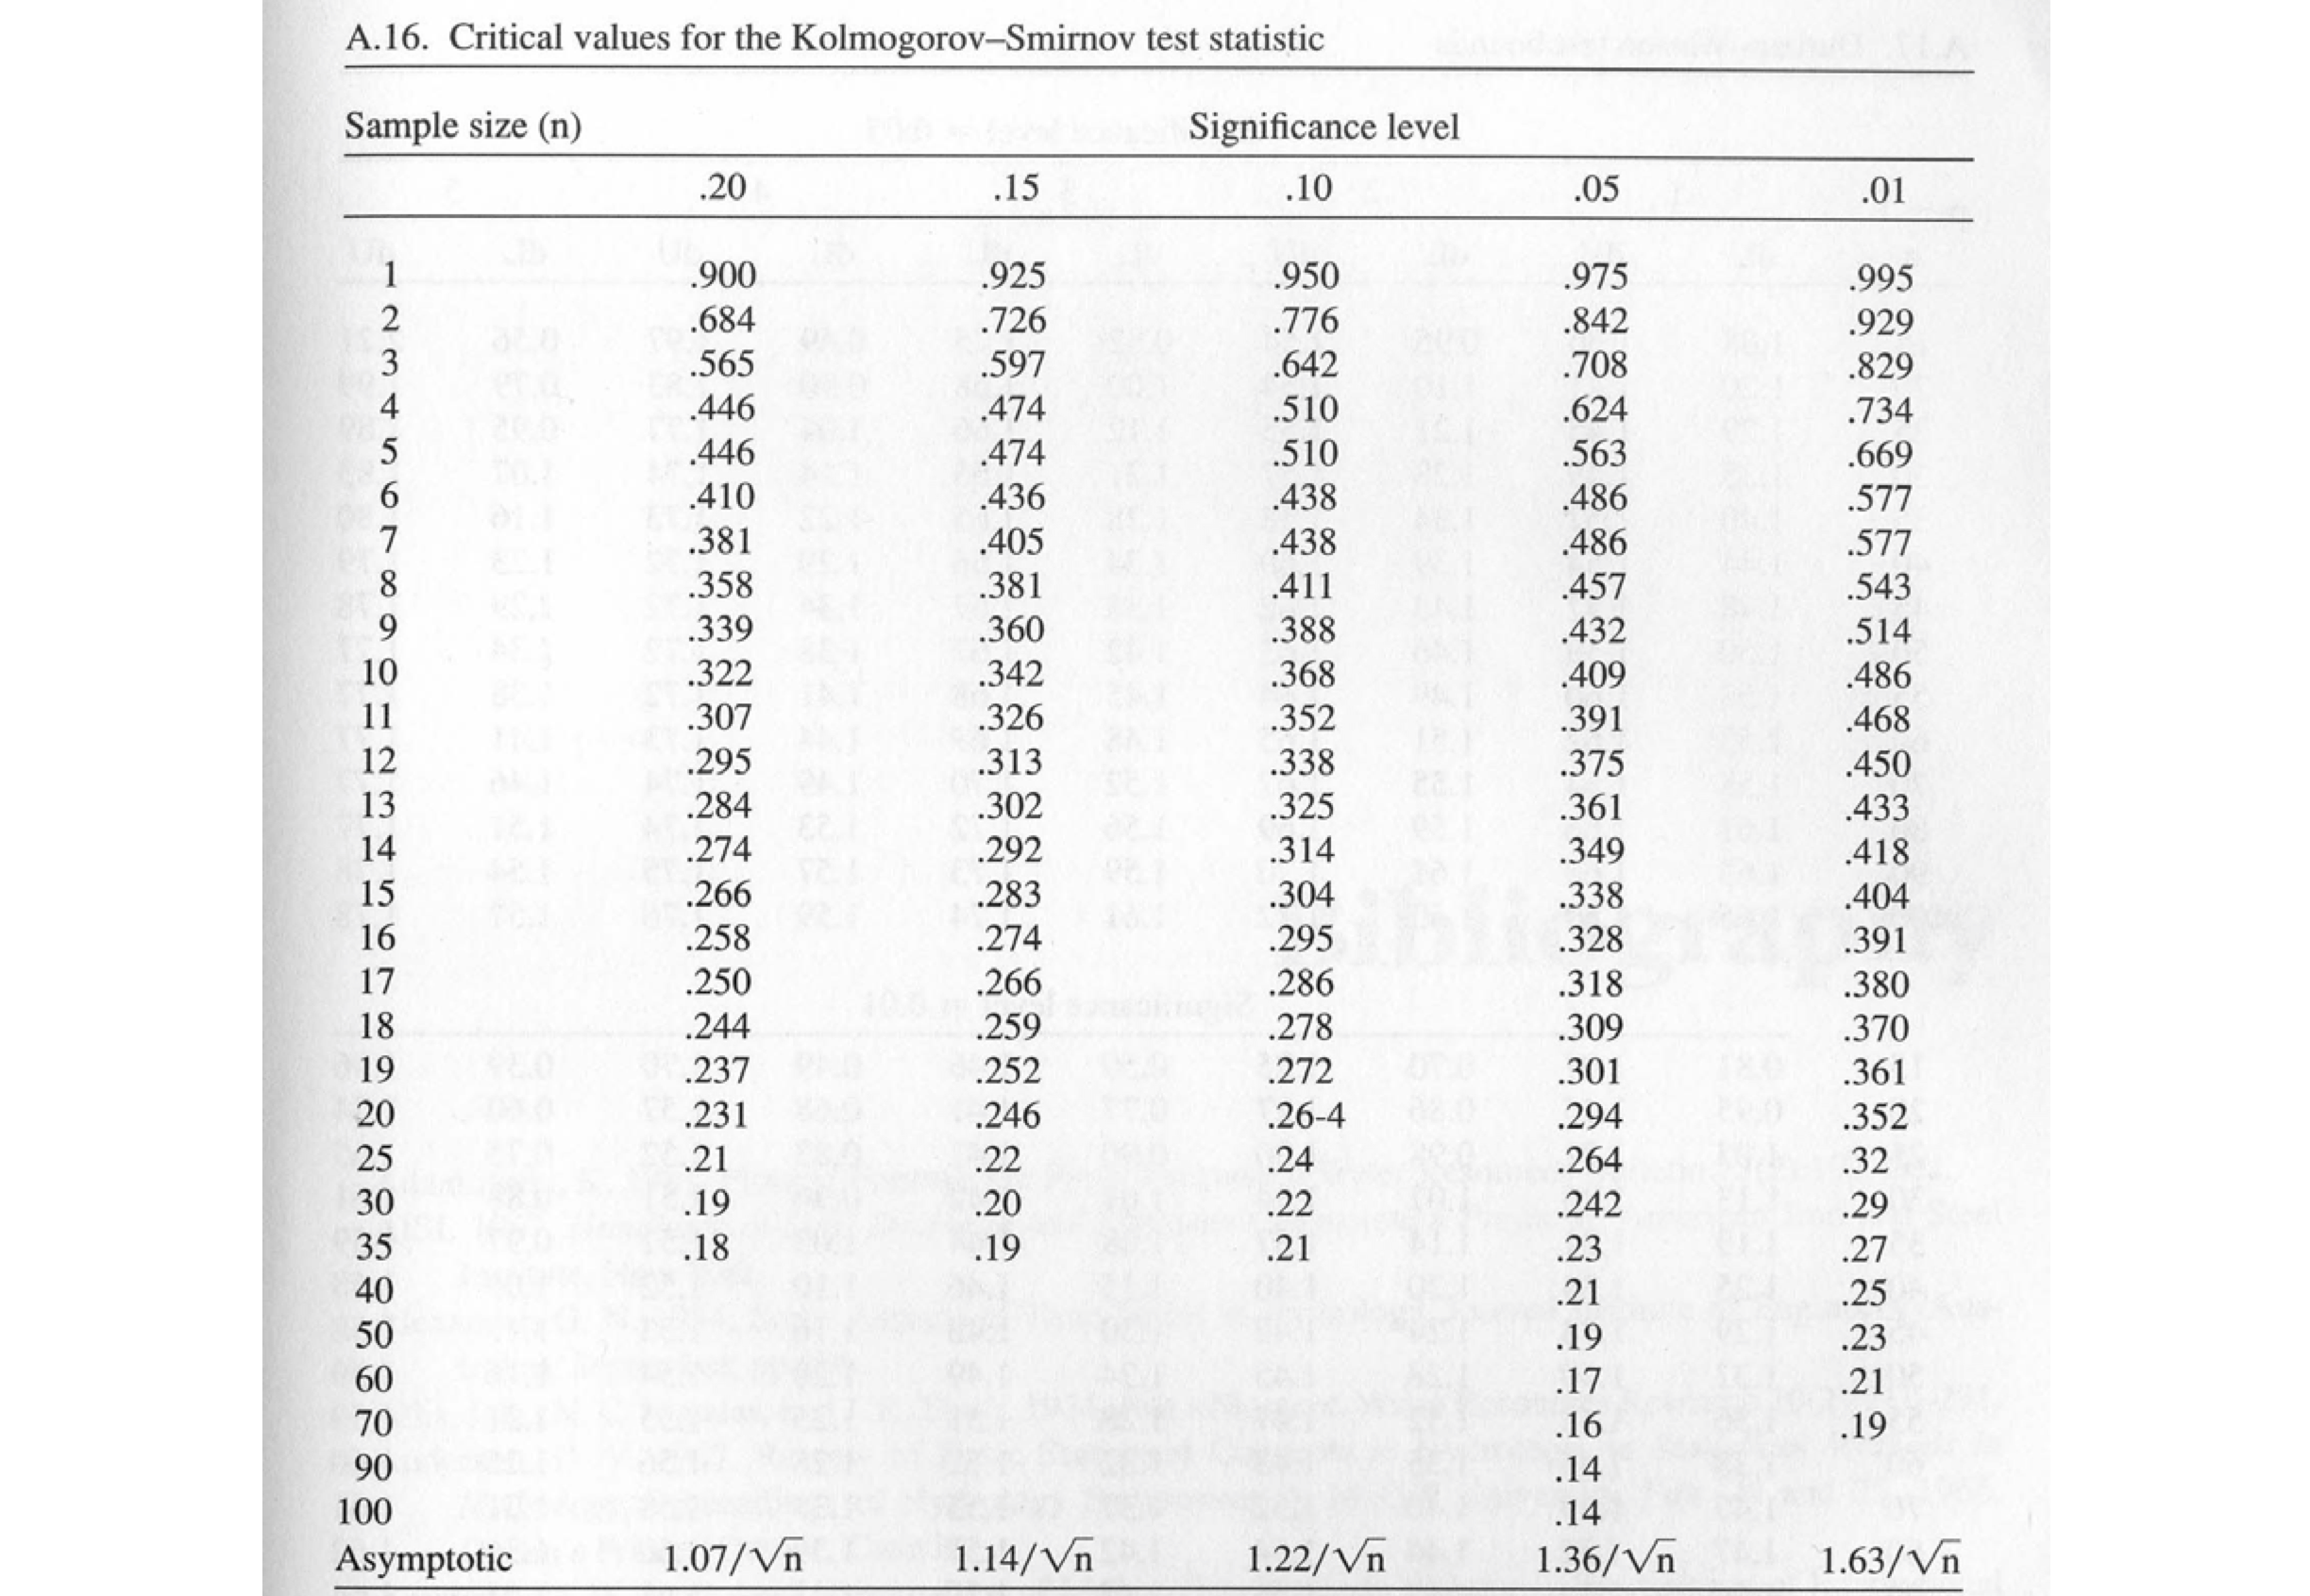

$$D_{\text{critical}} = 0.391 \ \ (\text{from appendix, table A16}) $$

$$\Rightarrow \text{max}|D| < D_{critical} $$

And therefore the hypothesis that the data are normally distributed cannot be rejected.

<IPython.core.display.Javascript object>


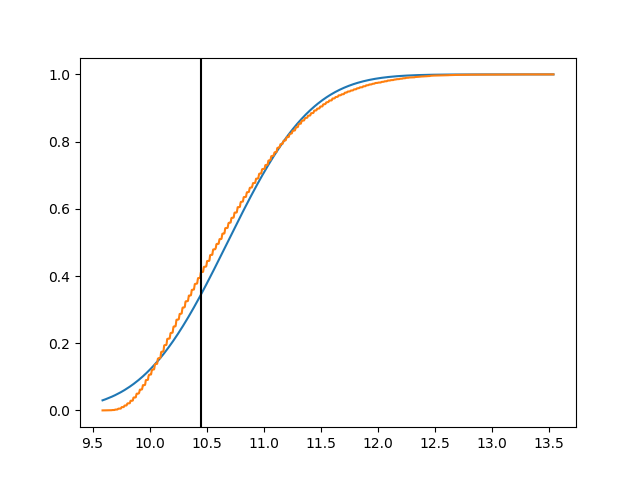

max|D| = 0.066
D_critical (a=0.05) = 0.010


In [9]:
#let's use the KS-test to check normality of the temperature data from above

T_sorted = np.sort(df['T_degC'])

Fobs = np.sort(df['T_degC'].rank()/N)

z = (T_sorted-np.mean(T_sorted))/np.std(T_sorted)
Fex = stats.norm.cdf(z)

D = np.abs(Fex-Fobs)

plt.plot(T_sorted,Fex,'-')
plt.plot(T_sorted,Fobs,'-')

plt.axvline(x=T_sorted[np.argmax(D)],color='k')

print("max|D| = %.3f" % max(D))
print("D_critical (a=0.05) = %.3f" % (1.36/np.sqrt(N)))


So just like the Chi2 test above, KS rejects the hypothesis that the temperature data was drawn from a normal distribution.



In [10]:
#same test in Scipy

from scipy.stats import kstest

x0=df['T_degC'].values

kstest(x0, 'norm', args=(np.mean(x0),np.std(x0)))


KstestResult(statistic=0.06711181337276745, pvalue=7.635825036440066e-71)

In [13]:
#an example which is actually normally distributed

x1 = np.random.normal(5.0, 2., 1000)

kstest(x1, 'norm', args=(np.mean(x1),np.std(x1)))


KstestResult(statistic=0.017429771581120357, pvalue=0.9216290265790713)

In [17]:
#two-sample KS test
from scipy.stats import ks_2samp

x2 = np.random.normal(5.1, 2., 10000000)

ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.04654350000000007, pvalue=0.025402286099650954)

In [3]:
from scipy.stats import kstest
import scipy.stats as st

In [23]:
kstest(st.norm.rvs(size=1000000,loc=123,scale=456), 'norm', args=(123,456))

KstestResult(statistic=0.0010623242983177628, pvalue=0.20907429467428396)

In [24]:
?kstest